# Summary 
W will explore several classical ML models to test the prediction accuracy for stock price.

## Data

Russel-daily 

## Models
1, random forest model 

Summary: It seems random forest works good, check the prediction accuracy and the fitted curve.

2, Treat the data as sequential data, perform some time series analysis 


In [3]:

import numpy as np 
import pandas as pd 

#ploting 

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")

In [25]:
path = '../Data/df.csv'

In [26]:
df1 = pd.read_csv(path,  parse_dates=['Date'])
df1

,Date,Close,tby,ffr,fta,eps,div,une,wti,ppi,rfs
0,2003-01-02,909.03,4.07,1.24,732202.0,40.40,1.79,5.8,31.97,135.3,295248.0
1,2003-01-03,908.59,4.05,1.24,732202.0,40.40,1.79,5.8,33.26,135.3,295248.0
2,2003-01-06,929.01,4.09,1.24,732202.0,40.40,1.79,5.8,32.29,135.3,295248.0
3,2003-01-07,922.93,4.04,1.24,732202.0,40.40,1.79,5.8,31.20,135.3,295248.0
4,2003-01-08,909.93,4.00,1.24,724902.0,40.40,1.79,5.8,30.66,135.3,295248.0
...,...,...,...,...,...,...,...,...,...,...,...
4515,2021-01-25,3855.36,1.05,0.09,7414942.0,95.72,1.58,6.3,52.78,204.3,576466.0
4516,2021-01-26,3849.62,1.05,0.09,7414942.0,95.72,1.58,6.3,52.61,204.3,576466.0
4517,2021-01-27,3750.77,1.04,0.09,7404926.0,95.72,1.58,6.3,52.81,204.3,576466.0
4518,2021-01-28,3787.38,1.07,0.09,7404926.0,95.72,1.58,6.3,52.26,204.3,576466.0


In [27]:
import datetime as datetime
ctf_date = datetime.datetime(2020, 3, 1)
df = df1.loc[df1.Date < ctf_date , ].copy()
df

,Date,Close,tby,ffr,fta,eps,div,une,wti,ppi,rfs
0,2003-01-02,909.03,4.07,1.24,732202.0,40.40,1.79,5.8,31.97,135.3,295248.0
1,2003-01-03,908.59,4.05,1.24,732202.0,40.40,1.79,5.8,33.26,135.3,295248.0
2,2003-01-06,929.01,4.09,1.24,732202.0,40.40,1.79,5.8,32.29,135.3,295248.0
3,2003-01-07,922.93,4.04,1.24,732202.0,40.40,1.79,5.8,31.20,135.3,295248.0
4,2003-01-08,909.93,4.00,1.24,724902.0,40.40,1.79,5.8,30.66,135.3,295248.0
...,...,...,...,...,...,...,...,...,...,...,...
4285,2020-02-24,3225.89,1.38,1.58,4171570.0,135.28,1.79,3.5,51.36,196.7,525810.0
4286,2020-02-25,3128.21,1.33,1.58,4171570.0,135.28,1.79,3.5,49.78,196.7,525810.0
4287,2020-02-26,3116.39,1.33,1.58,4158637.0,135.28,1.79,3.5,48.67,196.7,525810.0
4288,2020-02-27,2978.76,1.30,1.58,4158637.0,135.28,1.79,3.5,47.17,196.7,525810.0


In [28]:
cutoff = len(df) - 252
df_train = df[:cutoff].copy()
df_test = df[cutoff:].copy()
print(cutoff)

4038


In [24]:

#import random forest, use  open, low high, volume as X features, and close price as the 
# response variable y

from sklearn.model_selection import train_test_split

X = data[['Open','High','Low','Volume']]
y = data['Close']

#train test split in a time sequential way

X_train, X_test, y_train, y_test  = X[:8000], X[8001:], y[:8000],y[8001:]
#= train_test_split(X,y,test_size = 0.4, random_state=820)


In [17]:
#build the random forest model and fit it using X,y data 


from sklearn.ensemble import RandomForestRegressor as RFG
my_rfg = RFG(n_estimators = 200, random_state =820)
my_rfg.fit(df_train.copy(),df_train.Close.copy())


NameError: name 'X_train' is not defined

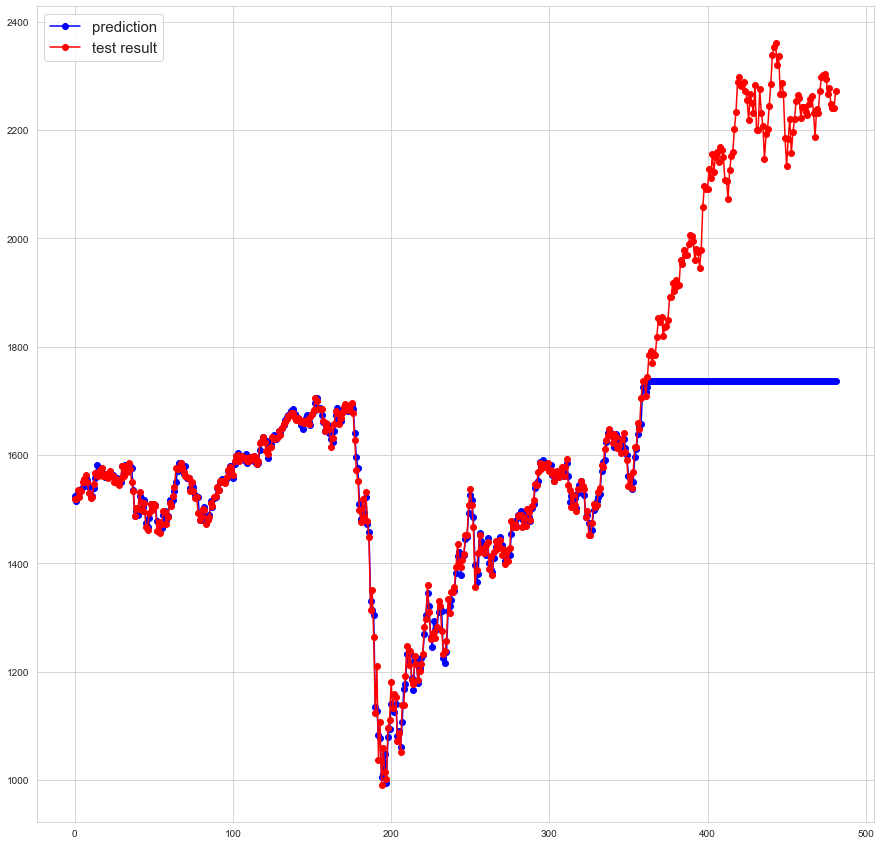

In [26]:
#make prediction and compare it with the y value in testing data

y_pred = my_rfg.predict(X_test)
plt.figure(figsize=(15,15))
plt.plot(range(len(y_pred)),y_pred,'b-o',label="prediction")
plt.plot(range(len(y_test)),y_test,'r-o',label="test result")
plt.legend(fontsize =15)
plt.show()

In [ ]:
from fbprophet import Prophet
fbp = Prophet(daily_seasonality=True)

# fit close price using fbprophet model
fbp.fit(df_train[['ds','y']])
    
 # predict pred_size futures and get the forecast price 
fut = fbp.make_future_dataframe(periods = pred_periods, freq='D')
forecast = fbp.predict(fut) 

From the above plot, we can see that the prediction is very good up to some time point, 
which means the random forest model can not predict too far in the future.

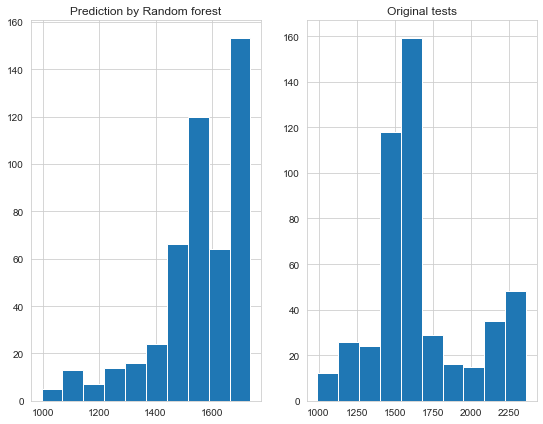

In [27]:
plt.figure(figsize=(14,7))
plt.subplot(131)
plt.hist(y_pred)
plt.title("Prediction by Random forest")
plt.subplot(132)
plt.hist(y_test)
plt.title("Original tests")
plt.show()

In [28]:
sum((y_test-y_pred)**2)/len(y_test)

44730.01040847737

# Time series analysis part

In this part, we will examine the time series model to predict price
